In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#setting the display options for pandas
pd.set_option('display.notebook_repr_html', True) #display pandas DataFrames as HTML tables
pd.set_option('display.precision', 2) #sets the precision for displaying numerical data to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format) #sets the floating-point number format to two decimal 
                                                       #places using Python string formatting

In [5]:
#load the data
df = pd.read_excel('Health_API_SH.XPD.CHEX.GD.ZS_DS2_en_excel_v2_15.xls', skiprows=3)

In [6]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.84,6.00,6.10,5.95,5.81,5.83,5.88,5.87,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.53,10.11,11.82,12.62,14.21,14.83,15.53,21.83,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.58,3.81,3.80,3.82,3.43,3.42,3.84,4.14,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.43,2.61,2.71,2.79,2.59,2.48,3.22,2.96,NaN,NaN


In [7]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [8]:
#finding the top 10 gdp spenders from 2016-2021

#sum the gdp spending across all years for each country
gdp_total = df.groupby('Country Name').sum()

#calculate the total gdp spending for each country from 2016 to 2021
gdp_total['Total'] = gdp_total.loc[:, '2017':'2022'].sum(axis=1)

#sort the countries based on their total gdp spending
top_ten_countries = gdp_total.nlargest(50, 'Total')['Total']

#print the top ten countries
print(top_ten_countries)

Country Name
Tuvalu                      104.16
United States               102.75
North America               100.21
Afghanistan                  79.02
Germany                      72.81
Marshall Islands             69.61
Palau                        69.51
Canada                       69.34
Kiribati                     68.82
Post-demographic dividend    66.76
Sweden                       65.81
United Kingdom               65.15
OECD members                 64.49
High income                  63.35
Liberia                      62.83
Denmark                      61.23
Portugal                     60.54
Norway                       60.27
Nauru                        59.89
Cuba                         59.85
France                       58.09
Micronesia, Fed. Sts.        56.92
Switzerland                  56.41
Armenia                      56.33
Chile                        55.75
Austria                      54.71
Belgium                      54.70
Japan                        54.19
Lesotho

In [9]:
top_countries= ['Tuvalu','United States','Afghanistan','Germany','Marshall Islands','Palau','Canada','Kiribati','Sweden','United Kingdom']

In [13]:
years = list(range(2016,2022))
years

[2016, 2017, 2018, 2019, 2020, 2021]

In [14]:
#filter rows for the top countries
gdp = df[df['Country Name'].isin(top_countries)]

#filter columns for the specified years
gdp = gdp[['Country Name'] + [str(year) for year in years]]


gdp

,Country Name,2016,2017,2018,2019,2020,2021
2,Afghanistan,11.82,12.62,14.21,14.83,15.53,21.83
35,Canada,11.03,10.91,10.91,11.01,13.04,12.33
55,Germany,11.24,11.34,11.48,11.72,12.69,12.93
81,United Kingdom,9.73,9.60,9.73,9.96,12.16,12.36
124,Kiribati,10.47,11.46,12.97,12.59,16.99,14.81
155,Marshall Islands,15.74,14.39,15.26,14.83,12.59,12.55
188,Palau,11.63,12.53,12.86,13.40,14.34,16.38
223,Sweden,10.85,10.79,10.94,10.83,11.33,11.25
245,Tuvalu,18.62,24.28,18.64,22.41,18.86,19.97
251,United States,16.80,16.77,16.63,16.67,18.76,17.36


In [15]:
gdp = gdp.set_index('Country Name').loc[top_countries].reset_index()
gdp

,Country Name,2016,2017,2018,2019,2020,2021
0,Tuvalu,18.62,24.28,18.64,22.41,18.86,19.97
1,United States,16.80,16.77,16.63,16.67,18.76,17.36
2,Afghanistan,11.82,12.62,14.21,14.83,15.53,21.83
3,Germany,11.24,11.34,11.48,11.72,12.69,12.93
4,Marshall Islands,15.74,14.39,15.26,14.83,12.59,12.55
5,Palau,11.63,12.53,12.86,13.40,14.34,16.38
6,Canada,11.03,10.91,10.91,11.01,13.04,12.33
7,Kiribati,10.47,11.46,12.97,12.59,16.99,14.81
8,Sweden,10.85,10.79,10.94,10.83,11.33,11.25
9,United Kingdom,9.73,9.60,9.73,9.96,12.16,12.36


In [18]:
gdp.head(10)

,Country Name,2016,2017,2018,2019,2020,2021
0,Tuvalu,18.62,24.28,18.64,22.41,18.86,19.97
1,United States,16.80,16.77,16.63,16.67,18.76,17.36
2,Afghanistan,11.82,12.62,14.21,14.83,15.53,21.83
3,Germany,11.24,11.34,11.48,11.72,12.69,12.93
4,Marshall Islands,15.74,14.39,15.26,14.83,12.59,12.55
5,Palau,11.63,12.53,12.86,13.40,14.34,16.38
6,Canada,11.03,10.91,10.91,11.01,13.04,12.33
7,Kiribati,10.47,11.46,12.97,12.59,16.99,14.81
8,Sweden,10.85,10.79,10.94,10.83,11.33,11.25
9,United Kingdom,9.73,9.60,9.73,9.96,12.16,12.36


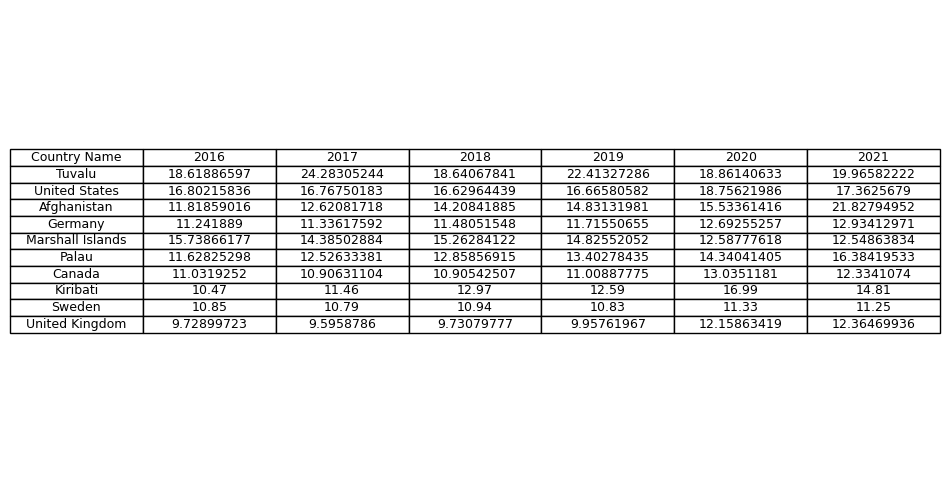

In [21]:
#data shows the top 10 gdp spenders 

#create a table plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')  # Hide the axes
ax.table(cellText=gdp.head(10).values,
         colLabels=gdp.columns,
         cellLoc='center',
         loc='center')

#save the chart as a PNG file with high resolution (300 DPI)
plt.savefig('top_10_gdp.png', dpi=300, bbox_inches='tight', pad_inches=0.2) #increase the padding
plt.show()

In [31]:
#creating graph showing the gdp spending of the top 10 countries

def plot_gdp_spending(gdp):
    #extracting unique country names from the 'Country Name' column
    countries = gdp['Country Name'].unique()

    #reordering countries to match the top_countries list
    countries = [country for country in top_countries if country in countries]

    #plotting the gdp spending for each country
    plt.figure(figsize=(12, 8))  # Set a larger figure size
    for country in countries:
        plt.plot(gdp.loc[gdp['Country Name'] == country, '2016':'2021'].values.flatten() / 1e9, label=country)

    #add title and labels to the plot
    plt.title('GDP Spending of Top 10 (2016-2021)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('GDP Spending (USD, Billions)', fontsize=14)
    
    #add a legend with country names
    plt.legend(title='Country', loc='upper left', fontsize=10, bbox_to_anchor=(1.02, 1), ncol=1)

    #set x-axis labels
    plt.xticks(ticks=range(6), labels=['2016','2017','2018', '2019', '2020', '2021',], fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(False)
    plt.margins(x=0)
    
    #save the chart as a PNG file with high resolution (300 DPI)
    plt.savefig('gdp_spending.png', dpi=300, bbox_inches='tight', pad_inches=0.2) #increase the padding
    plt.show() 

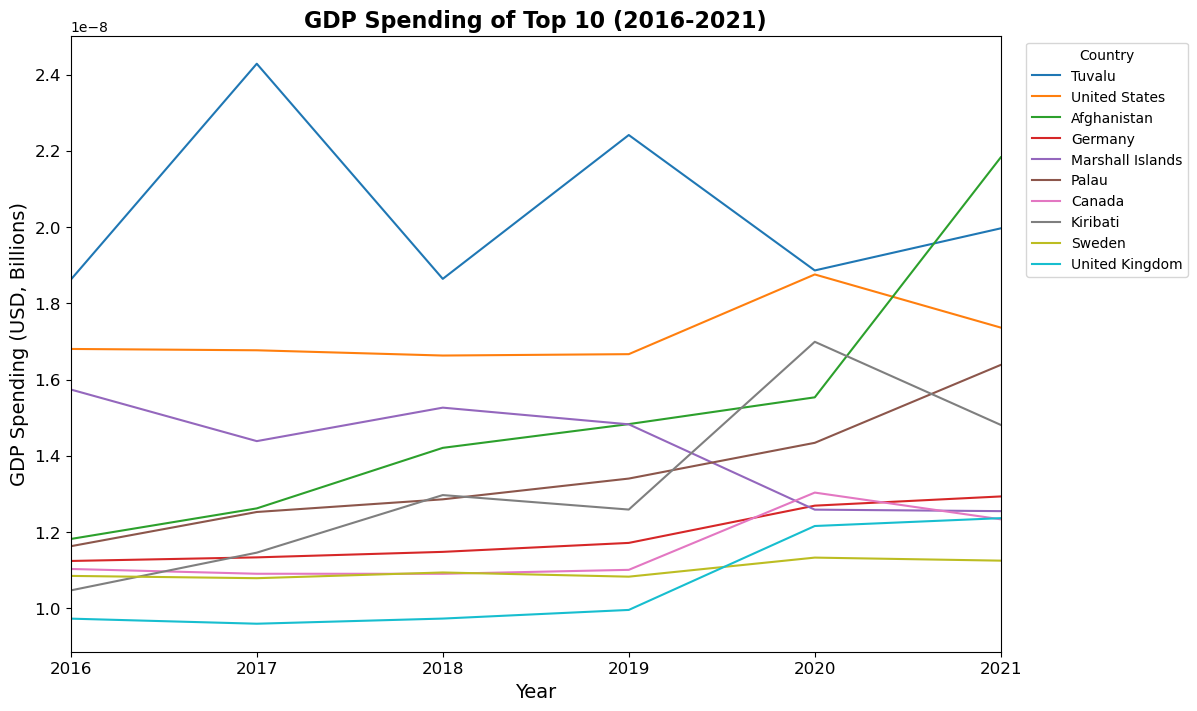

In [32]:
plot_gdp_spending(gdp)